In [81]:
import pandas as pd 
import numpy as np 
import statistics
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from datetime import datetime
from datetime import date
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error as mse

In [82]:
customer = pd.read_csv('olist_customers_dataset.csv')
order = pd.read_csv('olist_orders_dataset.csv')
review = pd.read_csv('olist_order_reviews_dataset.csv')
payment = pd.read_csv('olist_order_payments_dataset.csv')



In [83]:
pd.set_option('display.max_columns', None)

In [84]:
customer

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [85]:
customer[customer['customer_unique_id'].duplicated()]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
679,c57b4b6f3719475543b721e720a526ad,b6c083700ca8c135ba9f0f132930d4e8,8686,suzano,SP
1463,9f6f3da49e2d46e3a7529f5e3c25ecce,a40096fc0a3862e9e12bc55b5f8e6ab2,20561,rio de janeiro,RJ
1607,299f7b5125c8fbe1761a1b320c34fc7d,b8b3c435a58aebd788a477bed8342910,95585,arroio do sal,RS
2811,226d59f9f4b98e228b689eea45d03a6d,66980c3775537536f77b434d74e520f5,30290,belo horizonte,MG
3198,b1253701171dfb298f52a221f824e45b,788313d21c3507fe890921f6e17aa679,11070,santos,SP
...,...,...,...,...,...
99324,5b46a0d983eec8c97363bea78d4a69dd,8bab3162259edfaadd1ea2e1fe7f58dc,31565,belo horizonte,MG
99327,c1affa46f9f3b514555259049a0307b9,12ab9334b1240d6d037f2b0102a49571,38050,uberaba,MG
99336,ebf46ff530343a129926adc1f831dea4,0ee57f62666561b72f2ceacad0230cbf,9530,sao caetano do sul,SP
99353,282fbce48e4d2077aad602dd125c9225,0ceb502fc33a2ad327b08288c5310e2e,29134,viana,ES


In [86]:
order['order_approved_at'].fillna(0, inplace=True)
order['order_delivered_carrier_date'].fillna(0, inplace=True)
order['order_delivered_customer_date'].fillna(0, inplace=True)

In [87]:
time = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']

for i in time:
  order[i] = order[i] = pd.to_datetime(order[i], format='%Y-%m-%d %H:%M:%S', errors='coerce')


In [88]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [89]:
order['order_approved_at'].fillna(0, inplace=True)
order['order_delivered_carrier_date'].fillna(0, inplace=True)
order['order_delivered_customer_date'].fillna(0, inplace=True)

In [90]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99441 non-null  object        
 5   order_delivered_carrier_date   99441 non-null  object        
 6   order_delivered_customer_date  99441 non-null  object        
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(6)
memory usage: 6.1+ MB


In [91]:
time = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']

for i in time:
  order[i] = order[i] = pd.to_datetime(order[i], format='%Y-%m-%d %H:%M:%S', errors='coerce')


In [92]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [93]:
order[order['customer_id'].duplicated()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date


In [94]:
cm1 = customer.merge(order, how='inner', on='customer_id')

In [95]:
cm1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_id                    99441 non-null  object        
 1   customer_unique_id             99441 non-null  object        
 2   customer_zip_code_prefix       99441 non-null  int64         
 3   customer_city                  99441 non-null  object        
 4   customer_state                 99441 non-null  object        
 5   order_id                       99441 non-null  object        
 6   order_status                   99441 non-null  object        
 7   order_purchase_timestamp       99441 non-null  datetime64[ns]
 8   order_approved_at              99281 non-null  datetime64[ns]
 9   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 10  order_delivered_customer_date  96476 non-null  datetime64[ns]
 11  order_estimated

In [96]:
cm1[cm1['customer_unique_id'].duplicated()]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
679,c57b4b6f3719475543b721e720a526ad,b6c083700ca8c135ba9f0f132930d4e8,8686,suzano,SP,3c8194a8d47f5852dcd52ccbf364596e,delivered,2017-11-27 12:44:25,2017-11-27 12:56:18,2017-11-30 19:25:50,2017-12-01 17:05:02,2017-12-11
1463,9f6f3da49e2d46e3a7529f5e3c25ecce,a40096fc0a3862e9e12bc55b5f8e6ab2,20561,rio de janeiro,RJ,aec47b9987c836ffee2d7664b0929ec1,delivered,2017-10-10 18:31:36,2017-10-10 18:49:10,2017-10-13 17:07:01,2017-10-20 18:29:16,2017-11-17
1607,299f7b5125c8fbe1761a1b320c34fc7d,b8b3c435a58aebd788a477bed8342910,95585,arroio do sal,RS,5246f33ed41cfa5f5b8f64e7bc8cf0c2,delivered,2017-05-05 08:45:28,2017-05-05 08:55:17,2017-05-10 14:43:14,2017-05-17 15:00:14,2017-06-08
2811,226d59f9f4b98e228b689eea45d03a6d,66980c3775537536f77b434d74e520f5,30290,belo horizonte,MG,ef66cc60de5221417b5fb81b1c42de85,delivered,2018-03-31 15:08:21,2018-03-31 16:20:05,2018-04-03 16:31:15,2018-04-06 19:06:35,2018-05-04
3198,b1253701171dfb298f52a221f824e45b,788313d21c3507fe890921f6e17aa679,11070,santos,SP,afed0d88ec7753e7be8744bb66e860d1,canceled,2018-08-02 15:23:07,NaT,NaT,NaT,2018-08-20
...,...,...,...,...,...,...,...,...,...,...,...,...
99324,5b46a0d983eec8c97363bea78d4a69dd,8bab3162259edfaadd1ea2e1fe7f58dc,31565,belo horizonte,MG,3aefaf9d41208dba8b2c336def99b00f,delivered,2017-10-29 11:59:50,2017-10-30 10:12:39,2017-10-31 18:42:00,2017-11-06 21:18:53,2017-11-24
99327,c1affa46f9f3b514555259049a0307b9,12ab9334b1240d6d037f2b0102a49571,38050,uberaba,MG,46984ee8227e1926e055327b55ad576c,delivered,2017-12-13 17:35:26,2017-12-15 02:17:39,2017-12-19 20:33:02,2018-01-05 22:24:41,2018-01-22
99336,ebf46ff530343a129926adc1f831dea4,0ee57f62666561b72f2ceacad0230cbf,9530,sao caetano do sul,SP,181ff95f97fee531c4afa9e882186f18,delivered,2018-06-20 14:16:20,2018-06-20 14:38:41,2018-06-20 15:02:00,2018-06-27 13:18:47,2018-07-18
99353,282fbce48e4d2077aad602dd125c9225,0ceb502fc33a2ad327b08288c5310e2e,29134,viana,ES,0e48ca107de4291a6f7536b4f5cf512e,delivered,2018-05-15 10:39:41,2018-05-15 14:30:29,2018-05-15 15:55:00,2018-05-22 19:42:12,2018-06-12


In [97]:
cm1 = cm1.sort_values('order_purchase_timestamp').groupby('customer_unique_id').tail(1)

In [98]:
cm1

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
84697,08c5351a6aca1c1589a38f244edeee9d,b7d76e111c89f7ebf14761390f0f7d17,69309,boa vista,RR,2e7a8482f6fb09756ca50c10d7bfc047,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51,NaT,2016-10-20
70561,683c54fc24d40ee9f8a6fc179fd9856c,4854e9b3feff728c13ee5fc7d1547e92,99025,passo fundo,RS,e5fa5a7210941f7d56d0208e4e071d35,canceled,2016-09-05 00:15:34,2016-10-07 13:17:15,NaT,NaT,2016-10-28
84845,622e13439d6b5a0b486c435618b2679e,009b0127b727ab0ba422f6d9604487c7,12244,sao jose dos campos,SP,809a282bbd5dbcabb6f2f724fca862ec,canceled,2016-09-13 15:24:19,2016-10-07 13:16:46,NaT,NaT,2016-09-30
21125,86dc2ffce2dfff336de2f386a786e574,830d5b7aaa3b6f1e9ad63703bec97d23,14600,sao joaquim da barra,SP,bfbd0f9bdef84302105ad712db648a6c,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04
90294,b106b360fe2ef8849fbbd056f777b4d5,0eb1ee9dba87f5b36b4613a65074337c,2975,sao paulo,SP,71303d7e93b399f5bcd537d124c0bcfa,canceled,2016-10-02 22:07:52,2016-10-06 15:50:56,NaT,NaT,2016-10-25
...,...,...,...,...,...,...,...,...,...,...,...,...
75985,2823ffda607a2316375088e0d00005ec,9bb92bebd4cb7511e1a02d5e50bc4655,7176,guarulhos,SP,392ed9afd714e3c74767d0c4d3e3f477,canceled,2018-09-29 09:13:03,NaT,NaT,NaT,2018-10-15
75902,bf6181a85bbb4115736c0a8db1a53be3,634420a0ea42302205032ed44ac7fccc,27175,pirai,RJ,616fa7d4871b87832197b2a137a115d2,canceled,2018-10-01 15:30:09,NaT,NaT,NaT,2018-10-23
68312,4c2ec60c29d10c34bd49cb88aa85cfc4,af5454198a97379394cacf676e1e96cb,11900,registro,SP,a2ac6dad85cf8af5b0afb510a240fe8c,canceled,2018-10-03 18:55:29,NaT,NaT,NaT,2018-10-16
69139,856336203359aa6a61bf3826f7d84c49,262e1f1e26e92e86375f86840b4ffd63,64600,picos,PI,b059ee4de278302d550a3035c4cdb740,canceled,2018-10-16 20:16:02,NaT,NaT,NaT,2018-11-12


In [99]:
time = ['review_creation_date','review_answer_timestamp']

for i in time:
  review[i] = pd.to_datetime(review[i])

In [100]:
review[review['order_id'].duplicated()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
1119,46abf3ea0b2710ad41390fdb79c32d84,5040757d4e06a4be96d3827b860b4e7c,5,NaN,NaN,2017-11-07,2017-11-10 20:07:48
3109,aa193e76d35950c4ae988237bb36ed2b,cf73e2cb1f4a9480ed70c154da3d954a,5,NaN,NaN,2018-01-18,2018-01-18 17:36:45
8108,40294ea5a778dc62080d6b3f55d361ce,e1bc1083cd7acd30d0576335373b907d,5,NaN,NaN,2018-03-23,2018-03-24 00:23:06
9064,32e2c7e889f7a185d462265398ee3631,c7cfea0c153e6382e32e84c2a9dd7d2e,5,NaN,NaN,2017-10-21,2017-10-22 00:47:25
9795,95a3135743556b117d888cc8c6e12e11,f9c78e6e58306dc81efbbada1ac11f24,3,NaN,O produto chegou antes do prazo mas recebi um ...,2017-09-14,2017-09-17 11:14:08
...,...,...,...,...,...,...,...
98989,dfb3db02188d809d5cd199496b6da87e,c0db7d31ace61fc360a3eaa34dd3457c,5,NaN,NaN,2018-02-17,2018-02-19 19:29:19
99108,2c6c08892b83ba4c1be33037c2842294,42ae1967f68c90bb325783ac55d761ce,4,NaN,"Chegou um pouco amassada, mas nada de mais, e ...",2017-07-03,2017-07-05 19:06:59
99164,2afe63a67dfd99b3038f568fb47ee761,c5334d330e36d2a810a7a13c72e135ee,5,NaN,"Muito bom, produto conforme anunciado, entrega...",2018-03-03,2018-03-04 22:56:47
99178,44d1e9165ec54b1d89d33594856af859,a7dbcf5043158d6fa72859eead2f3d10,4,NaN,NaN,2017-05-24,2017-05-24 23:15:21


In [101]:
review = review.sort_values('review_answer_timestamp').groupby('order_id').tail(1)

In [102]:
review['review_comment_title'].fillna('Null', inplace=True)
review['review_comment_message'].fillna('Null', inplace=True)

In [103]:
review.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98673 entries, 37547 to 80582
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                98673 non-null  object        
 1   order_id                 98673 non-null  object        
 2   review_score             98673 non-null  int64         
 3   review_comment_title     98673 non-null  object        
 4   review_comment_message   98673 non-null  object        
 5   review_creation_date     98673 non-null  datetime64[ns]
 6   review_answer_timestamp  98673 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 6.0+ MB


In [104]:
cm2 = cm1.merge(review, how='left', on='order_id')

In [105]:
cm2

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,08c5351a6aca1c1589a38f244edeee9d,b7d76e111c89f7ebf14761390f0f7d17,69309,boa vista,RR,2e7a8482f6fb09756ca50c10d7bfc047,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51,NaT,2016-10-20,cef1ee03ded4d6272894a2eead6e1328,1.0,Null,1 mes de atraso na entrega !!! ultima compra q...,2016-10-22,2016-11-15 16:00:34
1,683c54fc24d40ee9f8a6fc179fd9856c,4854e9b3feff728c13ee5fc7d1547e92,99025,passo fundo,RS,e5fa5a7210941f7d56d0208e4e071d35,canceled,2016-09-05 00:15:34,2016-10-07 13:17:15,NaT,NaT,2016-10-28,a93139d9d1314158c080e3db7e79618b,1.0,Null,Comprei dois produtos desta loja parceira da l...,2016-10-29,2016-10-30 01:47:48
2,622e13439d6b5a0b486c435618b2679e,009b0127b727ab0ba422f6d9604487c7,12244,sao jose dos campos,SP,809a282bbd5dbcabb6f2f724fca862ec,canceled,2016-09-13 15:24:19,2016-10-07 13:16:46,NaT,NaT,2016-09-30,69ac6a27fde9855ebeaaecac0f78058b,1.0,Null,MEU PEDIDO NÃO FOI ENTREGUE E NÃO FOI DADA NEN...,2016-10-02,2016-10-26 12:31:00
3,86dc2ffce2dfff336de2f386a786e574,830d5b7aaa3b6f1e9ad63703bec97d23,14600,sao joaquim da barra,SP,bfbd0f9bdef84302105ad712db648a6c,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04,6916ca4502d6d3bfd39818759d55d536,1.0,Null,nao recebi o produto e nem resposta da empresa,2016-10-06,2016-10-07 18:32:28
4,b106b360fe2ef8849fbbd056f777b4d5,0eb1ee9dba87f5b36b4613a65074337c,2975,sao paulo,SP,71303d7e93b399f5bcd537d124c0bcfa,canceled,2016-10-02 22:07:52,2016-10-06 15:50:56,NaT,NaT,2016-10-25,34d62feeefaf60ef6ff7204af19fe109,1.0,Null,Null,2016-10-27,2016-10-27 23:40:51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96091,2823ffda607a2316375088e0d00005ec,9bb92bebd4cb7511e1a02d5e50bc4655,7176,guarulhos,SP,392ed9afd714e3c74767d0c4d3e3f477,canceled,2018-09-29 09:13:03,NaT,NaT,NaT,2018-10-15,f1f8696d256889c0fe9962a5d32746e0,1.0,Null,o produto foi entregue errado eu estou esperad...,2018-08-26,2018-08-28 01:26:38
96092,bf6181a85bbb4115736c0a8db1a53be3,634420a0ea42302205032ed44ac7fccc,27175,pirai,RJ,616fa7d4871b87832197b2a137a115d2,canceled,2018-10-01 15:30:09,NaT,NaT,NaT,2018-10-23,8b8f495d30fca09fdc8312e96de1bc47,2.0,Null,Null,2018-08-23,2018-08-23 23:14:33
96093,4c2ec60c29d10c34bd49cb88aa85cfc4,af5454198a97379394cacf676e1e96cb,11900,registro,SP,a2ac6dad85cf8af5b0afb510a240fe8c,canceled,2018-10-03 18:55:29,NaT,NaT,NaT,2018-10-16,4548534449b1f572e357211b90724f1b,1.0,Null,quero devolver o produto comprei um veio outro...,2018-08-18,2018-08-19 00:39:54
96094,856336203359aa6a61bf3826f7d84c49,262e1f1e26e92e86375f86840b4ffd63,64600,picos,PI,b059ee4de278302d550a3035c4cdb740,canceled,2018-10-16 20:16:02,NaT,NaT,NaT,2018-11-12,48198628b2d43ed394089750acc59c3f,5.0,Gostei,Os produtos são de boa qualidade e o preço que...,2018-06-27,2018-06-30 01:48:53


In [106]:
cm2['review_score'].fillna(0, inplace=True)
cm2['review_comment_title'].fillna('None', inplace=True)
cm2['review_comment_message'].fillna('No Comment', inplace=True)

In [107]:
cm2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96096 entries, 0 to 96095
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_id                    96096 non-null  object        
 1   customer_unique_id             96096 non-null  object        
 2   customer_zip_code_prefix       96096 non-null  int64         
 3   customer_city                  96096 non-null  object        
 4   customer_state                 96096 non-null  object        
 5   order_id                       96096 non-null  object        
 6   order_status                   96096 non-null  object        
 7   order_purchase_timestamp       96096 non-null  datetime64[ns]
 8   order_approved_at              95964 non-null  datetime64[ns]
 9   order_delivered_carrier_date   94403 non-null  datetime64[ns]
 10  order_delivered_customer_date  93270 non-null  datetime64[ns]
 11  order_estimated

In [108]:
payment[payment['order_id'].duplicated()]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
1456,683bf306149bb869980b68d48a1bd6ab,1,credit_card,1,8.58
2324,e6a66a8350bb88497954d37688ab123e,2,voucher,1,10.51
2393,8e5148bee82a7e42c5f9ba76161dc51a,1,credit_card,1,0.67
2414,816ccd9d21435796e8ffa9802b2a782f,1,credit_card,1,5.65
2497,2cbcb371aee438c59b722a21d83597e0,2,voucher,1,7.80
...,...,...,...,...,...
103778,fd86c80924b4be8fb7f58c4ecc680dae,1,credit_card,1,76.10
103817,6d4616de4341417e17978fe57aec1c46,1,credit_card,1,19.18
103860,31bc09fdbd701a7a4f9b55b5955b8687,6,voucher,1,77.99
103869,c9b01bef18eb84888f0fd071b8413b38,1,credit_card,6,238.16


In [109]:
payment_type =payment.groupby('order_id')['payment_type'].agg(lambda x: pd.Series.mode(x)[0])

In [110]:
payment_type

order_id
00010242fe8c5a6d1ba2dd792cb16214    credit_card
00018f77f2f0320c557190d7a144bdd3    credit_card
000229ec398224ef6ca0657da4fc703e    credit_card
00024acbcdf0a6daa1e931b038114c75    credit_card
00042b26cf59d7ce69dfabb4e55b4fd9    credit_card
                                       ...     
fffc94f6ce00a00581880bf54a75a037         boleto
fffcd46ef2263f404302a634eb57f7eb         boleto
fffce4705a9662cd70adb13d4a31832d    credit_card
fffe18544ffabc95dfada21779c9644f    credit_card
fffe41c64501cc87c801fd61db3f6244    credit_card
Name: payment_type, Length: 99440, dtype: object

In [111]:
payment_sequential = payment.groupby('order_id').agg(payment_sequential=('payment_sequential','median'))
payment_sequential

,payment_sequential
order_id,
00010242fe8c5a6d1ba2dd792cb16214,1.0
00018f77f2f0320c557190d7a144bdd3,1.0
000229ec398224ef6ca0657da4fc703e,1.0
00024acbcdf0a6daa1e931b038114c75,1.0
00042b26cf59d7ce69dfabb4e55b4fd9,1.0
...,...
fffc94f6ce00a00581880bf54a75a037,1.0
fffcd46ef2263f404302a634eb57f7eb,1.0
fffce4705a9662cd70adb13d4a31832d,1.0


In [112]:
payment_installments = payment.groupby('order_id').agg(payment_installments=('payment_installments','median'))
payment_installments

,payment_installments
order_id,
00010242fe8c5a6d1ba2dd792cb16214,2.0
00018f77f2f0320c557190d7a144bdd3,3.0
000229ec398224ef6ca0657da4fc703e,5.0
00024acbcdf0a6daa1e931b038114c75,2.0
00042b26cf59d7ce69dfabb4e55b4fd9,3.0
...,...
fffc94f6ce00a00581880bf54a75a037,1.0
fffcd46ef2263f404302a634eb57f7eb,1.0
fffce4705a9662cd70adb13d4a31832d,3.0


In [113]:
cm3 = cm2.merge(payment_type, how='inner', on='order_id')

In [114]:
cm3 = cm3.merge(payment_sequential, how='inner', on='order_id')

In [115]:
cm3 = cm3.merge(payment_installments, how='inner', on='order_id')

In [116]:
cm3

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_type,payment_sequential,payment_installments
0,08c5351a6aca1c1589a38f244edeee9d,b7d76e111c89f7ebf14761390f0f7d17,69309,boa vista,RR,2e7a8482f6fb09756ca50c10d7bfc047,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51,NaT,2016-10-20,cef1ee03ded4d6272894a2eead6e1328,1.0,Null,1 mes de atraso na entrega !!! ultima compra q...,2016-10-22,2016-11-15 16:00:34,credit_card,1.0,1.0
1,683c54fc24d40ee9f8a6fc179fd9856c,4854e9b3feff728c13ee5fc7d1547e92,99025,passo fundo,RS,e5fa5a7210941f7d56d0208e4e071d35,canceled,2016-09-05 00:15:34,2016-10-07 13:17:15,NaT,NaT,2016-10-28,a93139d9d1314158c080e3db7e79618b,1.0,Null,Comprei dois produtos desta loja parceira da l...,2016-10-29,2016-10-30 01:47:48,credit_card,1.0,3.0
2,622e13439d6b5a0b486c435618b2679e,009b0127b727ab0ba422f6d9604487c7,12244,sao jose dos campos,SP,809a282bbd5dbcabb6f2f724fca862ec,canceled,2016-09-13 15:24:19,2016-10-07 13:16:46,NaT,NaT,2016-09-30,69ac6a27fde9855ebeaaecac0f78058b,1.0,Null,MEU PEDIDO NÃO FOI ENTREGUE E NÃO FOI DADA NEN...,2016-10-02,2016-10-26 12:31:00,credit_card,1.0,2.0
3,b106b360fe2ef8849fbbd056f777b4d5,0eb1ee9dba87f5b36b4613a65074337c,2975,sao paulo,SP,71303d7e93b399f5bcd537d124c0bcfa,canceled,2016-10-02 22:07:52,2016-10-06 15:50:56,NaT,NaT,2016-10-25,34d62feeefaf60ef6ff7204af19fe109,1.0,Null,Null,2016-10-27,2016-10-27 23:40:51,credit_card,1.0,1.0
4,7ec40b22510fdbea1b08921dd39e63d8,2f64e403852e6893ae37485d5fcacdaf,98280,panambi,RS,be5bc2f0da14d8071e2d45451ad119d9,delivered,2016-10-03 16:56:50,2016-10-06 16:03:44,2016-10-21 16:33:46,2016-10-27 18:19:38,2016-11-07,dc62f1e20d7f280e54066b6a92841086,4.0,Null,Tudo certo...,2016-10-28,2016-10-29 11:29:53,boleto,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96090,2823ffda607a2316375088e0d00005ec,9bb92bebd4cb7511e1a02d5e50bc4655,7176,guarulhos,SP,392ed9afd714e3c74767d0c4d3e3f477,canceled,2018-09-29 09:13:03,NaT,NaT,NaT,2018-10-15,f1f8696d256889c0fe9962a5d32746e0,1.0,Null,o produto foi entregue errado eu estou esperad...,2018-08-26,2018-08-28 01:26:38,voucher,1.0,1.0
96091,bf6181a85bbb4115736c0a8db1a53be3,634420a0ea42302205032ed44ac7fccc,27175,pirai,RJ,616fa7d4871b87832197b2a137a115d2,canceled,2018-10-01 15:30:09,NaT,NaT,NaT,2018-10-23,8b8f495d30fca09fdc8312e96de1bc47,2.0,Null,Null,2018-08-23,2018-08-23 23:14:33,voucher,1.0,1.0
96092,4c2ec60c29d10c34bd49cb88aa85cfc4,af5454198a97379394cacf676e1e96cb,11900,registro,SP,a2ac6dad85cf8af5b0afb510a240fe8c,canceled,2018-10-03 18:55:29,NaT,NaT,NaT,2018-10-16,4548534449b1f572e357211b90724f1b,1.0,Null,quero devolver o produto comprei um veio outro...,2018-08-18,2018-08-19 00:39:54,voucher,1.0,1.0
96093,856336203359aa6a61bf3826f7d84c49,262e1f1e26e92e86375f86840b4ffd63,64600,picos,PI,b059ee4de278302d550a3035c4cdb740,canceled,2018-10-16 20:16:02,NaT,NaT,NaT,2018-11-12,48198628b2d43ed394089750acc59c3f,5.0,Gostei,Os produtos são de boa qualidade e o preço que...,2018-06-27,2018-06-30 01:48:53,voucher,1.0,1.0


In [117]:
cm3.isnull().sum()

customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 132
order_delivered_carrier_date     1693
order_delivered_customer_date    2826
order_estimated_delivery_date       0
review_id                         736
review_score                        0
review_comment_title                0
review_comment_message              0
review_creation_date              736
review_answer_timestamp           736
payment_type                        0
payment_sequential                  0
payment_installments                0
dtype: int64

In [118]:
cm3[cm3['customer_unique_id'].duplicated()]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_type,payment_sequential,payment_installments


In [119]:
cm3['expected_duration'] = (cm3['order_estimated_delivery_date'] - cm3['order_purchase_timestamp']).dt.total_seconds() / 3600

cm3['expected_duration'] = cm3['expected_duration'].astype('timedelta64[h]')

In [120]:
cm3['ship_duration'] = (cm3['order_delivered_customer_date'] - cm3['order_purchase_timestamp']).dt.total_seconds() /3600
cm3['ship_duration'] = cm3['ship_duration'].astype('timedelta64[h]')

In [121]:
cm3 = cm3.rename(columns = {"order_purchase_timestamp": "last_order"})
cm3

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,last_order,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_type,payment_sequential,payment_installments,expected_duration,ship_duration
0,08c5351a6aca1c1589a38f244edeee9d,b7d76e111c89f7ebf14761390f0f7d17,69309,boa vista,RR,2e7a8482f6fb09756ca50c10d7bfc047,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51,NaT,2016-10-20,cef1ee03ded4d6272894a2eead6e1328,1.0,Null,1 mes de atraso na entrega !!! ultima compra q...,2016-10-22,2016-11-15 16:00:34,credit_card,1.0,1.0,45 days 02:00:00,NaT
1,683c54fc24d40ee9f8a6fc179fd9856c,4854e9b3feff728c13ee5fc7d1547e92,99025,passo fundo,RS,e5fa5a7210941f7d56d0208e4e071d35,canceled,2016-09-05 00:15:34,2016-10-07 13:17:15,NaT,NaT,2016-10-28,a93139d9d1314158c080e3db7e79618b,1.0,Null,Comprei dois produtos desta loja parceira da l...,2016-10-29,2016-10-30 01:47:48,credit_card,1.0,3.0,52 days 23:00:00,NaT
2,622e13439d6b5a0b486c435618b2679e,009b0127b727ab0ba422f6d9604487c7,12244,sao jose dos campos,SP,809a282bbd5dbcabb6f2f724fca862ec,canceled,2016-09-13 15:24:19,2016-10-07 13:16:46,NaT,NaT,2016-09-30,69ac6a27fde9855ebeaaecac0f78058b,1.0,Null,MEU PEDIDO NÃO FOI ENTREGUE E NÃO FOI DADA NEN...,2016-10-02,2016-10-26 12:31:00,credit_card,1.0,2.0,16 days 08:00:00,NaT
3,b106b360fe2ef8849fbbd056f777b4d5,0eb1ee9dba87f5b36b4613a65074337c,2975,sao paulo,SP,71303d7e93b399f5bcd537d124c0bcfa,canceled,2016-10-02 22:07:52,2016-10-06 15:50:56,NaT,NaT,2016-10-25,34d62feeefaf60ef6ff7204af19fe109,1.0,Null,Null,2016-10-27,2016-10-27 23:40:51,credit_card,1.0,1.0,22 days 01:00:00,NaT
4,7ec40b22510fdbea1b08921dd39e63d8,2f64e403852e6893ae37485d5fcacdaf,98280,panambi,RS,be5bc2f0da14d8071e2d45451ad119d9,delivered,2016-10-03 16:56:50,2016-10-06 16:03:44,2016-10-21 16:33:46,2016-10-27 18:19:38,2016-11-07,dc62f1e20d7f280e54066b6a92841086,4.0,Null,Tudo certo...,2016-10-28,2016-10-29 11:29:53,boleto,1.0,1.0,34 days 07:00:00,24 days 01:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96090,2823ffda607a2316375088e0d00005ec,9bb92bebd4cb7511e1a02d5e50bc4655,7176,guarulhos,SP,392ed9afd714e3c74767d0c4d3e3f477,canceled,2018-09-29 09:13:03,NaT,NaT,NaT,2018-10-15,f1f8696d256889c0fe9962a5d32746e0,1.0,Null,o produto foi entregue errado eu estou esperad...,2018-08-26,2018-08-28 01:26:38,voucher,1.0,1.0,15 days 14:00:00,NaT
96091,bf6181a85bbb4115736c0a8db1a53be3,634420a0ea42302205032ed44ac7fccc,27175,pirai,RJ,616fa7d4871b87832197b2a137a115d2,canceled,2018-10-01 15:30:09,NaT,NaT,NaT,2018-10-23,8b8f495d30fca09fdc8312e96de1bc47,2.0,Null,Null,2018-08-23,2018-08-23 23:14:33,voucher,1.0,1.0,21 days 08:00:00,NaT
96092,4c2ec60c29d10c34bd49cb88aa85cfc4,af5454198a97379394cacf676e1e96cb,11900,registro,SP,a2ac6dad85cf8af5b0afb510a240fe8c,canceled,2018-10-03 18:55:29,NaT,NaT,NaT,2018-10-16,4548534449b1f572e357211b90724f1b,1.0,Null,quero devolver o produto comprei um veio outro...,2018-08-18,2018-08-19 00:39:54,voucher,1.0,1.0,12 days 05:00:00,NaT
96093,856336203359aa6a61bf3826f7d84c49,262e1f1e26e92e86375f86840b4ffd63,64600,picos,PI,b059ee4de278302d550a3035c4cdb740,canceled,2018-10-16 20:16:02,NaT,NaT,NaT,2018-11-12,48198628b2d43ed394089750acc59c3f,5.0,Gostei,Os produtos são de boa qualidade e o preço que...,2018-06-27,2018-06-30 01:48:53,voucher,1.0,1.0,26 days 03:00:00,NaT


In [122]:
now = '2018-12-31 23:59:59'
def churned(x):
    try:
        chn_now = pd.to_datetime(now)
        chn_last_order = pd.to_datetime(x)
        timedelta = chn_now - chn_last_order
        chnday = timedelta.days
        if chnday > 360:
            return True
        else:
            return False
    except:
        return True
    
cm3['churned'] = cm3.last_order.apply(lambda x: churned(x))

In [123]:
cm3['churned'].unique()

array([ True, False])

In [124]:
cm3

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,last_order,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_type,payment_sequential,payment_installments,expected_duration,ship_duration,churned
0,08c5351a6aca1c1589a38f244edeee9d,b7d76e111c89f7ebf14761390f0f7d17,69309,boa vista,RR,2e7a8482f6fb09756ca50c10d7bfc047,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51,NaT,2016-10-20,cef1ee03ded4d6272894a2eead6e1328,1.0,Null,1 mes de atraso na entrega !!! ultima compra q...,2016-10-22,2016-11-15 16:00:34,credit_card,1.0,1.0,45 days 02:00:00,NaT,True
1,683c54fc24d40ee9f8a6fc179fd9856c,4854e9b3feff728c13ee5fc7d1547e92,99025,passo fundo,RS,e5fa5a7210941f7d56d0208e4e071d35,canceled,2016-09-05 00:15:34,2016-10-07 13:17:15,NaT,NaT,2016-10-28,a93139d9d1314158c080e3db7e79618b,1.0,Null,Comprei dois produtos desta loja parceira da l...,2016-10-29,2016-10-30 01:47:48,credit_card,1.0,3.0,52 days 23:00:00,NaT,True
2,622e13439d6b5a0b486c435618b2679e,009b0127b727ab0ba422f6d9604487c7,12244,sao jose dos campos,SP,809a282bbd5dbcabb6f2f724fca862ec,canceled,2016-09-13 15:24:19,2016-10-07 13:16:46,NaT,NaT,2016-09-30,69ac6a27fde9855ebeaaecac0f78058b,1.0,Null,MEU PEDIDO NÃO FOI ENTREGUE E NÃO FOI DADA NEN...,2016-10-02,2016-10-26 12:31:00,credit_card,1.0,2.0,16 days 08:00:00,NaT,True
3,b106b360fe2ef8849fbbd056f777b4d5,0eb1ee9dba87f5b36b4613a65074337c,2975,sao paulo,SP,71303d7e93b399f5bcd537d124c0bcfa,canceled,2016-10-02 22:07:52,2016-10-06 15:50:56,NaT,NaT,2016-10-25,34d62feeefaf60ef6ff7204af19fe109,1.0,Null,Null,2016-10-27,2016-10-27 23:40:51,credit_card,1.0,1.0,22 days 01:00:00,NaT,True
4,7ec40b22510fdbea1b08921dd39e63d8,2f64e403852e6893ae37485d5fcacdaf,98280,panambi,RS,be5bc2f0da14d8071e2d45451ad119d9,delivered,2016-10-03 16:56:50,2016-10-06 16:03:44,2016-10-21 16:33:46,2016-10-27 18:19:38,2016-11-07,dc62f1e20d7f280e54066b6a92841086,4.0,Null,Tudo certo...,2016-10-28,2016-10-29 11:29:53,boleto,1.0,1.0,34 days 07:00:00,24 days 01:00:00,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96090,2823ffda607a2316375088e0d00005ec,9bb92bebd4cb7511e1a02d5e50bc4655,7176,guarulhos,SP,392ed9afd714e3c74767d0c4d3e3f477,canceled,2018-09-29 09:13:03,NaT,NaT,NaT,2018-10-15,f1f8696d256889c0fe9962a5d32746e0,1.0,Null,o produto foi entregue errado eu estou esperad...,2018-08-26,2018-08-28 01:26:38,voucher,1.0,1.0,15 days 14:00:00,NaT,False
96091,bf6181a85bbb4115736c0a8db1a53be3,634420a0ea42302205032ed44ac7fccc,27175,pirai,RJ,616fa7d4871b87832197b2a137a115d2,canceled,2018-10-01 15:30:09,NaT,NaT,NaT,2018-10-23,8b8f495d30fca09fdc8312e96de1bc47,2.0,Null,Null,2018-08-23,2018-08-23 23:14:33,voucher,1.0,1.0,21 days 08:00:00,NaT,False
96092,4c2ec60c29d10c34bd49cb88aa85cfc4,af5454198a97379394cacf676e1e96cb,11900,registro,SP,a2ac6dad85cf8af5b0afb510a240fe8c,canceled,2018-10-03 18:55:29,NaT,NaT,NaT,2018-10-16,4548534449b1f572e357211b90724f1b,1.0,Null,quero devolver o produto comprei um veio outro...,2018-08-18,2018-08-19 00:39:54,voucher,1.0,1.0,12 days 05:00:00,NaT,False
96093,856336203359aa6a61bf3826f7d84c49,262e1f1e26e92e86375f86840b4ffd63,64600,picos,PI,b059ee4de278302d550a3035c4cdb740,canceled,2018-10-16 20:16:02,NaT,NaT,NaT,2018-11-12,48198628b2d43ed394089750acc59c3f,5.0,Gostei,Os produtos são de boa qualidade e o preço que...,2018-06-27,2018-06-30 01:48:53,voucher,1.0,1.0,26 days 03:00:00,NaT,False


In [125]:
cm3_count = cm3.groupby('churned').agg(count_of_churn=('churned','count'))
cm3_count

,count_of_churn
churned,
False,52016
True,44079


In [126]:
def table(col_name):
    x = cm3.groupby(['churned', col_name])['customer_id'].nunique().reset_index(name='Customer')
    x1 = cm3.groupby([col_name])['customer_id'].nunique().reset_index(name='AllCustomer')
    x = x.merge(x1, on=col_name)
    x['Percentage'] = round(x['Customer']*100/x['AllCustomer'],2)
    return x

In [127]:
col_name = 'customer_state'

table(col_name)

,churned,customer_state,Customer,AllCustomer,Percentage
0,False,AC,27,77,35.06
1,True,AC,50,77,64.94
2,False,AL,197,400,49.25
3,True,AL,203,400,50.75
4,False,AM,73,143,51.05
5,True,AM,70,143,48.95
6,False,AP,36,67,53.73
7,True,AP,31,67,46.27
8,False,BA,1715,3275,52.37
9,True,BA,1560,3275,47.63


In [128]:
col_name = 'payment_type'

table(col_name)

,churned,payment_type,Customer,AllCustomer,Percentage
0,False,boleto,9805,19126,51.27
1,True,boleto,9321,19126,48.73
2,False,credit_card,40168,73583,54.59
3,True,credit_card,33415,73583,45.41
4,False,debit_card,1069,1491,71.70
5,True,debit_card,422,1491,28.30
6,False,not_defined,3,3,100.00
7,False,voucher,971,1892,51.32
8,True,voucher,921,1892,48.68


In [129]:
col_name = 'order_status'

table(col_name)

,churned,order_status,Customer,AllCustomer,Percentage
0,False,canceled,314,582,53.95
1,True,canceled,268,582,46.05
2,False,created,1,4,25.00
3,True,created,3,4,75.00
4,False,delivered,50851,93271,54.52
5,True,delivered,42420,93271,45.48
6,False,invoiced,120,304,39.47
7,True,invoiced,184,304,60.53
8,False,processing,52,289,17.99
9,True,processing,237,289,82.01


In [130]:
col_name = 'review_score'

table(col_name)

,churned,review_score,Customer,AllCustomer,Percentage
0,False,0.0,358,736,48.64
1,True,0.0,378,736,51.36
2,False,1.0,6016,10988,54.75
3,True,1.0,4972,10988,45.25
4,False,2.0,1595,3034,52.57
5,True,2.0,1439,3034,47.43
6,False,3.0,4160,7863,52.91
7,True,3.0,3703,7863,47.09
8,False,4.0,9807,18467,53.11
9,True,4.0,8660,18467,46.89


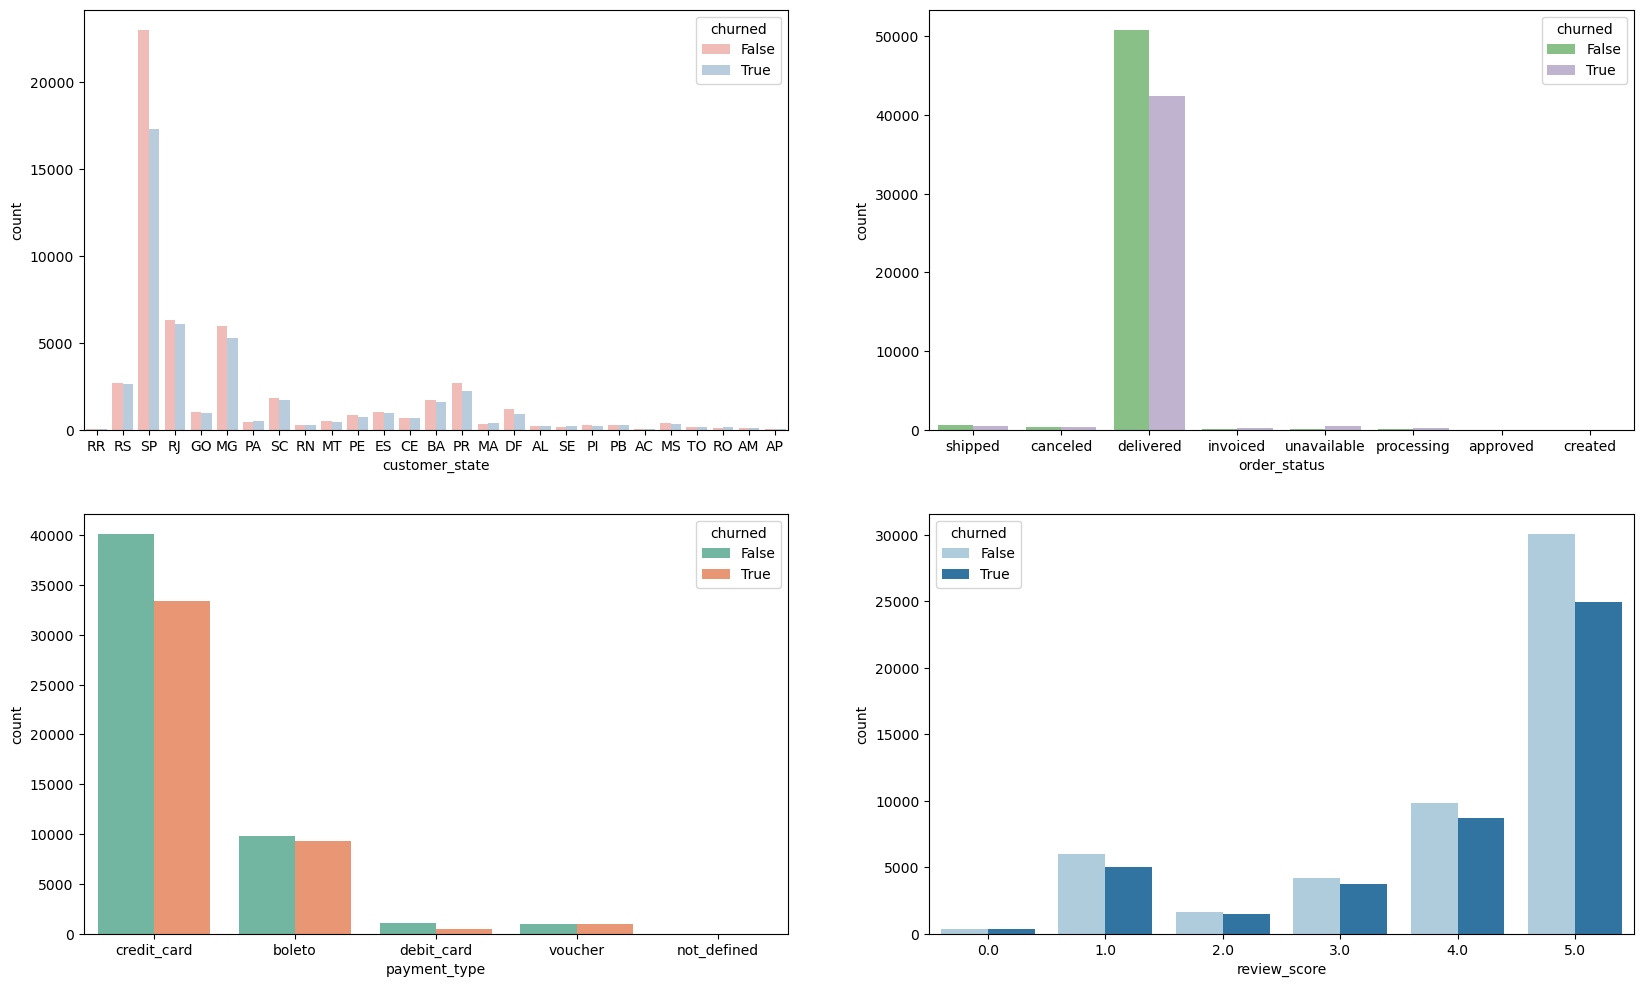

In [131]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='customer_state', hue = 'churned', data = cm3, palette='Pastel1', ax=axarr[0][0])
sns.countplot(x='order_status', hue = 'churned', data = cm3, palette='Accent',ax=axarr[0][1])
sns.countplot(x='payment_type', hue = 'churned', data = cm3, palette='Set2', ax=axarr[1][0])
sns.countplot(x='review_score', hue = 'churned', data = cm3, palette='Paired', ax=axarr[1][1])
plt.show()

In [132]:
cm3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96095 entries, 0 to 96094
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_id                    96095 non-null  object        
 1   customer_unique_id             96095 non-null  object        
 2   customer_zip_code_prefix       96095 non-null  int64         
 3   customer_city                  96095 non-null  object        
 4   customer_state                 96095 non-null  object        
 5   order_id                       96095 non-null  object        
 6   order_status                   96095 non-null  object        
 7   last_order                     96095 non-null  datetime64[ns]
 8   order_approved_at              95963 non-null  datetime64[ns]
 9   order_delivered_carrier_date   94402 non-null  datetime64[ns]
 10  order_delivered_customer_date  93269 non-null  datetime64[ns]
 11  order_estimated

In [133]:
cmml = cm3.drop(['customer_id','customer_unique_id','customer_zip_code_prefix','customer_city','order_id','last_order','order_approved_at',
                    'order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date','review_id','review_creation_date',
                    'review_answer_timestamp','review_comment_message','review_comment_title'], axis=1)

In [134]:
cmml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96095 entries, 0 to 96094
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   customer_state        96095 non-null  object        
 1   order_status          96095 non-null  object        
 2   review_score          96095 non-null  float64       
 3   payment_type          96095 non-null  object        
 4   payment_sequential    96095 non-null  float64       
 5   payment_installments  96095 non-null  float64       
 6   expected_duration     96095 non-null  timedelta64[s]
 7   ship_duration         93269 non-null  timedelta64[s]
 8   churned               96095 non-null  bool          
dtypes: bool(1), float64(3), object(3), timedelta64[s](2)
memory usage: 6.0+ MB


In [135]:
cmml['expected_duration'] = cmml['expected_duration'].dt.total_seconds().astype(float)
cmml['ship_duration'] = cmml['ship_duration'].dt.total_seconds().astype(float)


In [136]:
cmml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96095 entries, 0 to 96094
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customer_state        96095 non-null  object 
 1   order_status          96095 non-null  object 
 2   review_score          96095 non-null  float64
 3   payment_type          96095 non-null  object 
 4   payment_sequential    96095 non-null  float64
 5   payment_installments  96095 non-null  float64
 6   expected_duration     96095 non-null  float64
 7   ship_duration         93269 non-null  float64
 8   churned               96095 non-null  bool   
dtypes: bool(1), float64(5), object(3)
memory usage: 6.0+ MB


In [137]:
numerical_cols = [cname for cname in cmml.columns
                 if cmml[cname].dtype in ["int64", "float64"]]
cmml[numerical_cols].head(10)

,review_score,payment_sequential,payment_installments,expected_duration,ship_duration
0,1.0,1.0,1.0,3895200.0,NaN
1,1.0,1.0,3.0,4575600.0,NaN
2,1.0,1.0,2.0,1411200.0,NaN
3,1.0,1.0,1.0,1904400.0,NaN
4,4.0,1.0,1.0,2962800.0,2077200.0
5,1.0,1.0,1.0,4500000.0,3070800.0
6,3.0,1.0,1.0,4845600.0,2638800.0
7,1.0,1.0,6.0,4323600.0,2379600.0
8,5.0,1.0,4.0,4323600.0,925200.0
9,5.0,1.0,2.0,5014800.0,2646000.0


In [138]:
cmml['churned'].replace(to_replace='True', value=1, inplace=True)
cmml['churned'].replace(to_replace='False', value=0, inplace=True)

In [139]:
cmml['churned']=cmml['churned'].astype('int')
cmml['ship_duration'].fillna('0', inplace=True)

In [140]:
cmml['ship_duration'] = cmml['ship_duration'].astype(float)
cmml

,customer_state,order_status,review_score,payment_type,payment_sequential,payment_installments,expected_duration,ship_duration,churned
0,RR,shipped,1.0,credit_card,1.0,1.0,3895200.0,0.0,1
1,RS,canceled,1.0,credit_card,1.0,3.0,4575600.0,0.0,1
2,SP,canceled,1.0,credit_card,1.0,2.0,1411200.0,0.0,1
3,SP,canceled,1.0,credit_card,1.0,1.0,1904400.0,0.0,1
4,RS,delivered,4.0,boleto,1.0,1.0,2962800.0,2077200.0,1
...,...,...,...,...,...,...,...,...,...
96090,SP,canceled,1.0,voucher,1.0,1.0,1346400.0,0.0,0
96091,RJ,canceled,2.0,voucher,1.0,1.0,1843200.0,0.0,0
96092,SP,canceled,1.0,voucher,1.0,1.0,1054800.0,0.0,0
96093,PI,canceled,5.0,voucher,1.0,1.0,2257200.0,0.0,0


In [141]:
categorical_cols = [column for column, is_type in (cmml.dtypes=="object").items() if is_type]
categorical_cols

['customer_state', 'order_status', 'payment_type']

In [142]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
cmml['customer_state'] = labelencoder.fit_transform(cmml['customer_state'])
cmml

,customer_state,order_status,review_score,payment_type,payment_sequential,payment_installments,expected_duration,ship_duration,churned
0,21,shipped,1.0,credit_card,1.0,1.0,3895200.0,0.0,1
1,22,canceled,1.0,credit_card,1.0,3.0,4575600.0,0.0,1
2,25,canceled,1.0,credit_card,1.0,2.0,1411200.0,0.0,1
3,25,canceled,1.0,credit_card,1.0,1.0,1904400.0,0.0,1
4,22,delivered,4.0,boleto,1.0,1.0,2962800.0,2077200.0,1
...,...,...,...,...,...,...,...,...,...
96090,25,canceled,1.0,voucher,1.0,1.0,1346400.0,0.0,0
96091,18,canceled,2.0,voucher,1.0,1.0,1843200.0,0.0,0
96092,25,canceled,1.0,voucher,1.0,1.0,1054800.0,0.0,0
96093,16,canceled,5.0,voucher,1.0,1.0,2257200.0,0.0,0


In [143]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
cmml['order_status'] = labelencoder.fit_transform(cmml['order_status'])
cmml

,customer_state,order_status,review_score,payment_type,payment_sequential,payment_installments,expected_duration,ship_duration,churned
0,21,6,1.0,credit_card,1.0,1.0,3895200.0,0.0,1
1,22,1,1.0,credit_card,1.0,3.0,4575600.0,0.0,1
2,25,1,1.0,credit_card,1.0,2.0,1411200.0,0.0,1
3,25,1,1.0,credit_card,1.0,1.0,1904400.0,0.0,1
4,22,3,4.0,boleto,1.0,1.0,2962800.0,2077200.0,1
...,...,...,...,...,...,...,...,...,...
96090,25,1,1.0,voucher,1.0,1.0,1346400.0,0.0,0
96091,18,1,2.0,voucher,1.0,1.0,1843200.0,0.0,0
96092,25,1,1.0,voucher,1.0,1.0,1054800.0,0.0,0
96093,16,1,5.0,voucher,1.0,1.0,2257200.0,0.0,0


In [144]:
cmml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96095 entries, 0 to 96094
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customer_state        96095 non-null  int32  
 1   order_status          96095 non-null  int32  
 2   review_score          96095 non-null  float64
 3   payment_type          96095 non-null  object 
 4   payment_sequential    96095 non-null  float64
 5   payment_installments  96095 non-null  float64
 6   expected_duration     96095 non-null  float64
 7   ship_duration         96095 non-null  float64
 8   churned               96095 non-null  int32  
dtypes: float64(5), int32(3), object(1)
memory usage: 5.5+ MB


In [145]:
cm_dummies = pd.get_dummies(cmml)

In [146]:
cm_dummies

,customer_state,order_status,review_score,payment_sequential,payment_installments,expected_duration,ship_duration,churned,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_not_defined,payment_type_voucher
0,21,6,1.0,1.0,1.0,3895200.0,0.0,1,False,True,False,False,False
1,22,1,1.0,1.0,3.0,4575600.0,0.0,1,False,True,False,False,False
2,25,1,1.0,1.0,2.0,1411200.0,0.0,1,False,True,False,False,False
3,25,1,1.0,1.0,1.0,1904400.0,0.0,1,False,True,False,False,False
4,22,3,4.0,1.0,1.0,2962800.0,2077200.0,1,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96090,25,1,1.0,1.0,1.0,1346400.0,0.0,0,False,False,False,False,True
96091,18,1,2.0,1.0,1.0,1843200.0,0.0,0,False,False,False,False,True
96092,25,1,1.0,1.0,1.0,1054800.0,0.0,0,False,False,False,False,True
96093,16,1,5.0,1.0,1.0,2257200.0,0.0,0,False,False,False,False,True


In [147]:
X = cm_dummies.loc[:, cm_dummies.columns != 'churned']
y = cm_dummies['churned']

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [149]:
import warnings
warnings.filterwarnings('ignore')

In [150]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc
from sklearn.metrics import make_scorer,accuracy_score,roc_auc_score,precision_score,recall_score,f1_score,log_loss
from sklearn.metrics import confusion_matrix

In [151]:
all_model = [LogisticRegression,
             KNeighborsClassifier,
             RandomForestClassifier,
             GradientBoostingClassifier,
             GaussianNB,
             XGBClassifier]

model_name = ['LogisticRegression',
             'KNeighborsClassifier',
             'RandomForestClassifier',
             'GradientBoostingClassifier',
             'GaussianNB',
             'XGBClassifier']

## loop for all model
datatr = []
datasc = []
Recall =[]
Precision =[]
auc =[]

for idx, model_type in enumerate(all_model):
    AccTrain = []
    AccTest = []
    RecallTemp = []
    PrecisionTemp = []
    AucTemp = []
        
    model = model_type()
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
        
    AccTrain.append(model.score(X_train , y_train))
    AccTest.append(model.score(X_test , y_test))
    RecallTemp.append(recall_score(y_test,y_pred))
    PrecisionTemp.append(precision_score(y_test,y_pred))
    AucTemp.append(roc_auc_score(y_test, y_pred))
 
    datatr.append(np.mean(AccTrain))
    datasc.append(np.mean(AccTest))
    Recall.append(np.mean(RecallTemp))
    Precision.append(np.mean(PrecisionTemp))
    auc.append(np.mean(AucTemp))

In [152]:
data_result = pd.DataFrame()
data_result['model'] = model_name
data_result['Accuracy training'] = datatr
data_result['Accuracy test'] = datasc
data_result['Precision'] = Precision
data_result['Recall']= Recall
data_result['AUC']=auc
data_result['gap'] = abs(data_result['Accuracy training'] - data_result['Accuracy test'])
data_result.sort_values(by='Accuracy test',ascending=False)

,model,Accuracy training,Accuracy test,Precision,Recall,AUC,gap
5,XGBClassifier,0.678131,0.635673,0.606627,0.585573,0.631856,0.042458
3,GradientBoostingClassifier,0.617774,0.623654,0.595010,0.562550,0.618998,0.005880
2,RandomForestClassifier,0.996423,0.598054,0.565767,0.532721,0.593076,0.398369
1,KNeighborsClassifier,0.729877,0.586815,0.551871,0.528524,0.582374,0.143062
0,LogisticRegression,0.541313,0.541235,0.000000,0.000000,0.500000,0.000078
4,GaussianNB,0.535161,0.538738,0.496049,0.341726,0.523728,0.003577


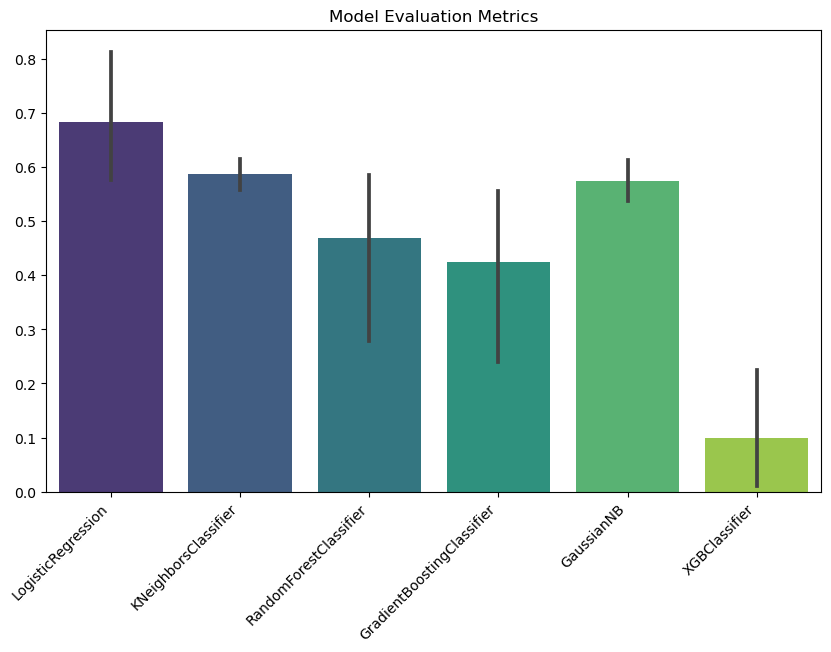

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns

# データの作成
model_names = data_result['model']
metrics = ['Accuracy training', 'Accuracy test', 'Precision', 'Recall', 'AUC', 'gap']
metrics_data = data_result[metrics]

# バー プロットの作成
plt.figure(figsize=(10, 6))
sns.barplot(data=metrics_data, palette="viridis")
plt.xticks(ticks=range(len(model_names)), labels=model_names, rotation=45, ha='right')
plt.title('Model Evaluation Metrics')
plt.show()

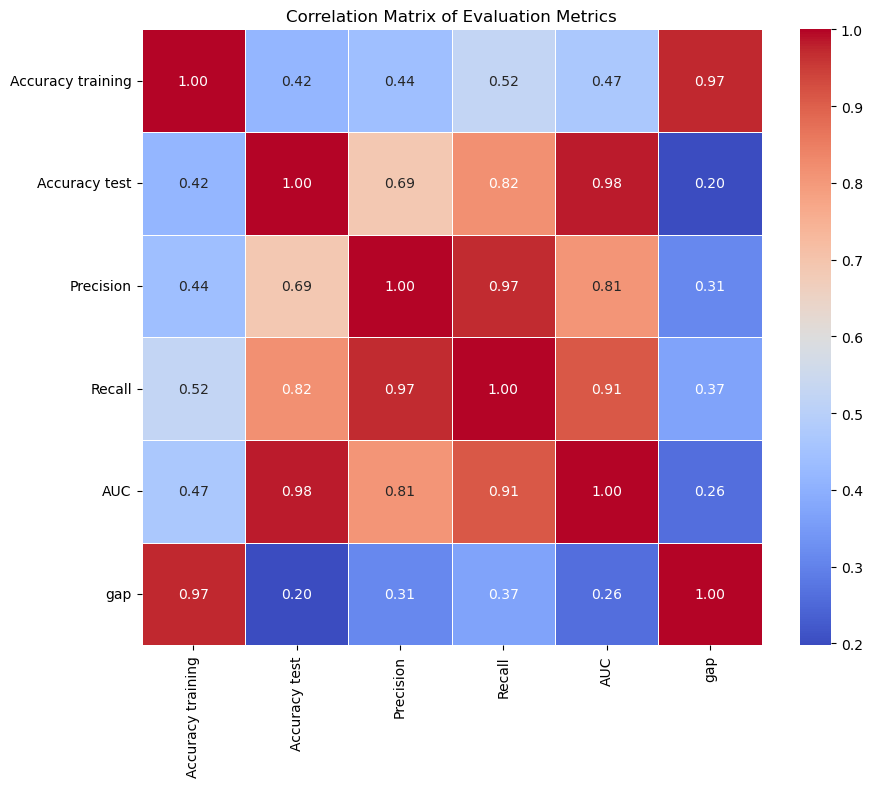

In [154]:
import seaborn as sns
import matplotlib.pyplot as plt

# メトリクス間の相関行列
correlation_matrix = data_result[['Accuracy training', 'Accuracy test', 'Precision', 'Recall', 'AUC', 'gap']].corr()

# ヒートマップの作成
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Evaluation Metrics')
plt.show()

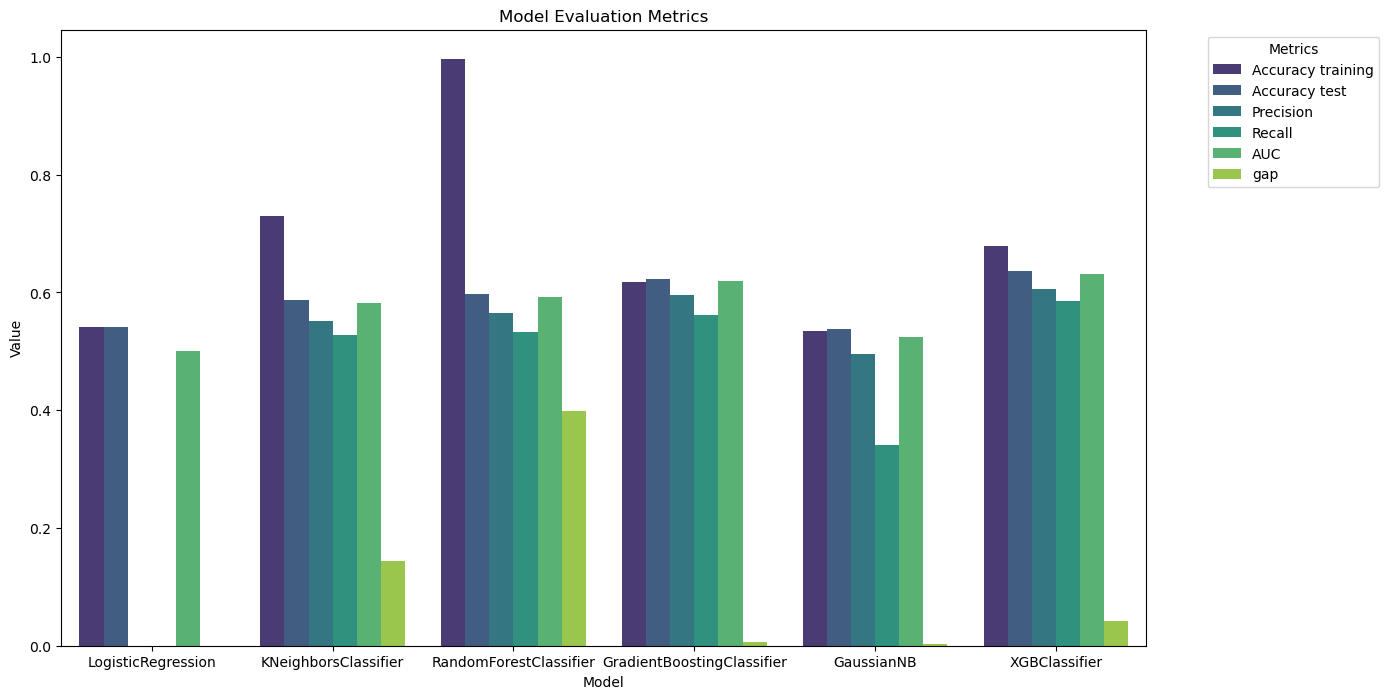

In [155]:
import matplotlib.pyplot as plt
import seaborn as sns

# データフレームから必要な列を抽出
plot_data = data_result.melt(id_vars='model', var_name='metric', value_name='value')

# グラフのサイズを設定
plt.figure(figsize=(14, 8))

# seabornを使用して棒グラフを描画
sns.barplot(x='model', y='value', hue='metric', data=plot_data, palette='viridis')

# グラフのタイトルと軸ラベルを設定
plt.title('Model Evaluation Metrics')
plt.xlabel('Model')
plt.ylabel('Value')

# 凡例を表示
plt.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')

# グラフを表示
plt.show()


In [156]:
import streamlit as st
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a function for your Streamlit app
def streamlit_app():
    # Assuming data_result is your DataFrame
    # If not, replace this with your actual DataFrame
    data_result = ...

    # データフレームから必要な列を抽出
    plot_data = data_result.melt(id_vars='model', var_name='metric', value_name='value')

    # グラフのサイズを設定
    plt.figure(figsize=(14, 8))

    # seabornを使用して棒グラフを描画
    sns.barplot(x='model', y='value', hue='metric', data=plot_data, palette='viridis')

    # グラフのタイトルと軸ラベルを設定
    plt.title('Model Evaluation Metrics')
    plt.xlabel('Model')
    plt.ylabel('Value')

    # 凡例を表示
    plt.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Save the plot to a BytesIO object
    img_stream = st.pyplot()

    # Display the plot in the Streamlit app
    st.image(img_stream)

# Run the Streamlit app using the magic command
!streamlit run churnjp.py

^C


In [159]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [ ]:
!streamlit run churnjp.py